<a href="https://colab.research.google.com/github/Rochakr4/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# **Objectives**

The objective of the project would be to derive meanignful insights from the given data set. Following are the pointers we would be focusing on:

1. Data cleaning and finalising features 
2. Analysing global terror events
3. Analysing most affected regions
4. Analysing most affected countries 

THE INFORMATION REGARDING COLOUMN SUCH AS COLOUMN DEFINITION AND EXPLANATION HAS BEEN TAKEN FROM [Global Terrorism Database (GTD) CODEBOOK: METHODOLOGY, INCLUSION CRITERIA, AND VARIABLES](https://www.start.umd.edu/gtd/downloads/Codebook.pdf)



#1. Data cleaning and finalising features

The GTD contains 135 columns and 181691 rows of data related to terror events from 1970 to 2017. So in this step, we will,

1. Eliminate unwanted columns
2. Comprehend the NaN values
3. Rename the column names for better understanding

In [ ]:
#The following libraries are used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  
from wordcloud import WordCloud 
import plotly.graph_objects as go
from matplotlib_venn import venn3, venn3_circles

In [ ]:
pip install --upgrade plotly

     |████████████████████████████████| 27.7 MB 92.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
#Mounting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
raw_global_terrorismdata=pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT 1- EDA on Global Terrorism Database/Global Terrorism Data.csv',encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [25]:
#creating a copy of dataframe
global_terrorismdata=raw_global_terrorismdata.copy()

In [26]:
#Analysing the type of coulmns
list(raw_global_terrorismdata)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [27]:
#Comprehending the NaN values and filling it will required values
global_terrorismdata['country_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['region_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['city'].fillna('Unknown',inplace=True)
global_terrorismdata['provstate'].fillna('Unknown',inplace=True)
global_terrorismdata['nwoundte'].fillna(0,inplace=True)
global_terrorismdata['ransomamt'].fillna(0,inplace=True)
global_terrorismdata['ransompaid'].fillna(0,inplace=True)
global_terrorismdata['success'].fillna('Unknown',inplace=True)
global_terrorismdata['attacktype1_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['targtype1_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['gname'].fillna('Unknown',inplace=True)
global_terrorismdata['weaptype1_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['nkill'].fillna(0,inplace=True)
global_terrorismdata['nwound'].fillna(0,inplace=True)
global_terrorismdata['propvalue'].fillna(0,inplace=True)
global_terrorismdata['property'].fillna(0,inplace=True)
global_terrorismdata['nkillter'].fillna(0,inplace=True)
global_terrorismdata['alternative_txt'].fillna('unknown',inplace=True)


In [28]:
#Eleminating columns with NaN values
na_coloumn=[]
for i in list(global_terrorismdata):
  if ((global_terrorismdata[i].isna().sum())*100/181691)>0:
    na_coloumn.append(i)
for i in na_coloumn:
   global_terrorismdata.drop(i, inplace=True, axis=1)
     

In [29]:
#Renaming the coloumn
global_terrorismdata.rename(columns={'iyear':'YEAR',
                           'imonth':'MONTH',
                           'iday':'DAY',
                           'country_txt':'COUNTRY',
                           'region_txt':'REGION',
                           'success':'SUCCESS',
                           'provstate':'STATE',
                           'attacktype1_txt':'ATTACK TYPE',
                           'targtype1_txt':'TARGET TYPE',
                           'gname':'ORGANISATION',
                           'weaptype1_txt':'WEAPON TYPE',
                           'nwound':'NO. OF WOUNDED',
                           'nkill':'NO. OF KILLED',
                           'nwoundte':'CULPRIT WOUNDED',
                           'ransomamt':'RANSOM AMOUNT',
                           'ransompaid':'RANSOM AMOUNT PAID',
                           'nkillter':'CULPRIT KILLED',
                           'doubtterr':'DOUBT TERROR',
                           'dbsource':'DATA BASE SOURCE'},inplace=True)

In [30]:
#Creating new coloumns for total number of casualities and no. of attacks
global_terrorismdata['CASUALTY']=global_terrorismdata['NO. OF KILLED']+global_terrorismdata['NO. OF WOUNDED']
global_terrorismdata['No.of attacks']=global_terrorismdata['eventid']/global_terrorismdata['eventid']

In [31]:
#Droping unwanted required coloumns
global_terrorismdata.drop(['extended','country','region','vicinity','suicide','attacktype1','targtype1','individual','weaptype1','DATA BASE SOURCE','INT_LOG','INT_IDEO','INT_MISC','INT_ANY','alternative_txt'], inplace=True, axis=1)

In [32]:
#Finalised list of columns for further analysis
list(global_terrorismdata)

['eventid',
 'YEAR',
 'MONTH',
 'DAY',
 'COUNTRY',
 'REGION',
 'STATE',
 'city',
 'crit1',
 'crit2',
 'crit3',
 'SUCCESS',
 'ATTACK TYPE',
 'TARGET TYPE',
 'ORGANISATION',
 'WEAPON TYPE',
 'NO. OF KILLED',
 'CULPRIT KILLED',
 'NO. OF WOUNDED',
 'CULPRIT WOUNDED',
 'property',
 'propvalue',
 'RANSOM AMOUNT',
 'RANSOM AMOUNT PAID',
 'CASUALTY',
 'No.of attacks']

# **2. ANALYSING GLOBAL TERROR EVENTS**

Here we will analyse terror situations at global scale

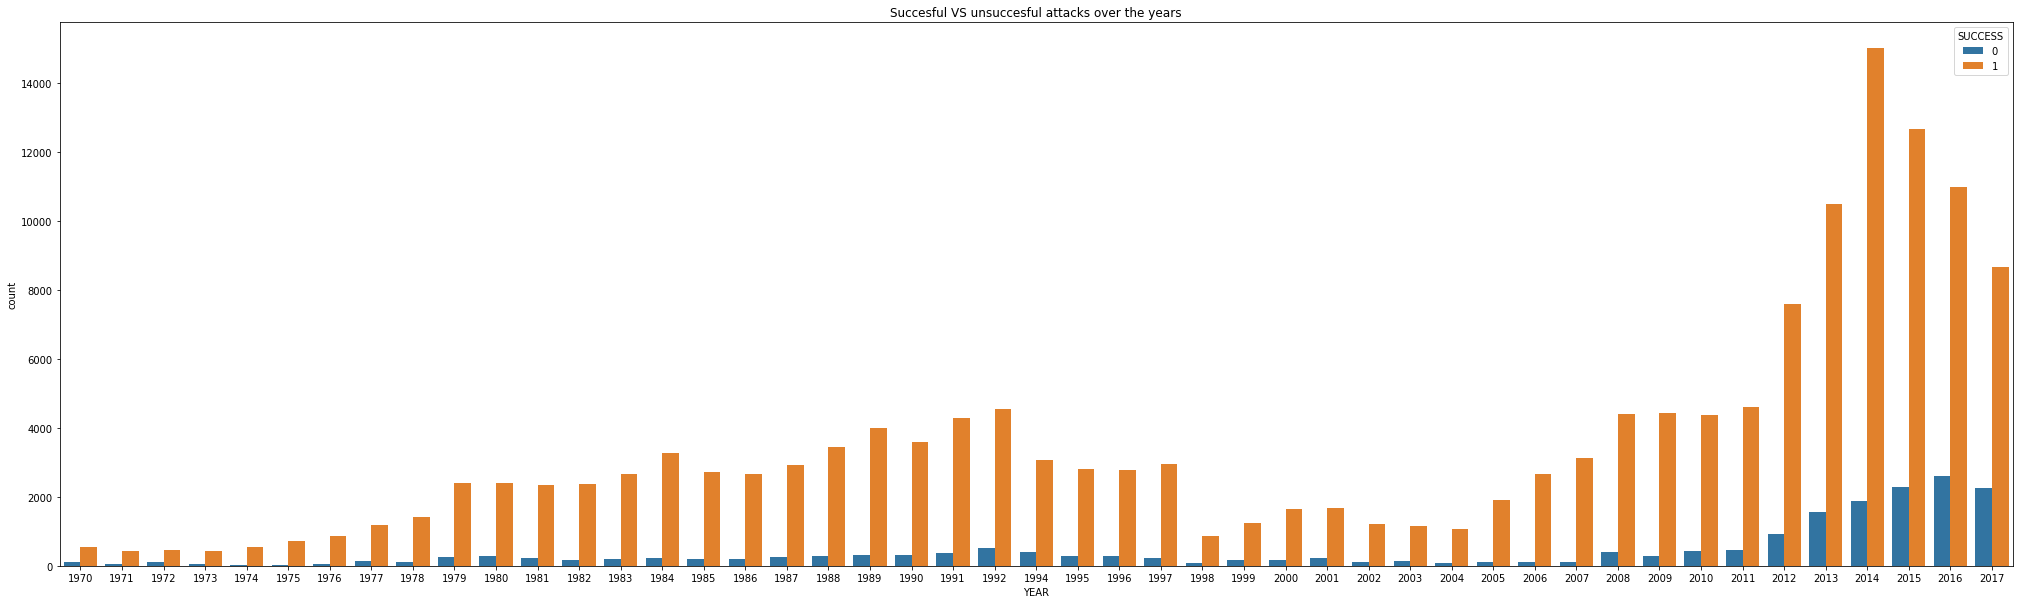

In [33]:
#Visualisation of number of attacks per year country wise
total_attacks=px.choropleth( global_terrorismdata.groupby(['YEAR','COUNTRY'])['No.of attacks'].count().reset_index(),locations='COUNTRY',locationmode='country names',color='No.of attacks', hover_name='COUNTRY',
                            title='NUMBER OF ATTACKS PER YEAR(1970-2017)',
                            color_continuous_scale = px.colors.sequential.OrRd,
                            animation_frame='YEAR')
total_attacks.show()
#Visualisation of total number of casualities country wise
total_casuality=px.choropleth( global_terrorismdata.groupby('COUNTRY')['CASUALTY'].sum().reset_index(),locations='COUNTRY',locationmode='country names',color='CASUALTY',
                            hover_name='COUNTRY',
                            title='TOTAL NUMBER OF CASUALITIES(1970-2017)',
                            color_continuous_scale = px.colors.sequential.OrRd )
total_casuality.show()        
#Count plot on Succesful VS unsuccesful attacks over the years
plt.rcParams['figure.figsize']=[35,10]
sns.countplot(x='YEAR',hue='SUCCESS',data=global_terrorismdata)
plt.title('Succesful VS unsuccesful attacks over the years')
plt.show()
#Line plot on region wise number of attacks and
Region_wise=px.line(data_frame=pd.merge(global_terrorismdata.groupby('REGION')['CASUALTY'].sum().reset_index(), global_terrorismdata.groupby('REGION')['No.of attacks'].count().reset_index(), how='inner').sort_values('No.of attacks',ascending=False)
                    ,y=['No.of attacks','CASUALTY'],x='REGION',title='REGION WISE NUNMBER OF ATTACKS AND CASUALITIES')
Region_wise.show()
#Treemap visualisation affected countries in terms of number of attack
treemap_country_wise=px.treemap(data_frame=global_terrorismdata,
                     values='CASUALTY',
                     path=['COUNTRY','STATE'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on country and state in terms of number of casualities',)
treemap_country_wise.show()

In [34]:
#Dataframe of top 2 regions affected by terrorism which in a way constituted 50% of total events
country_wise_attacks=global_terrorismdata.groupby('REGION')['No.of attacks'].count().sort_values(ascending=False).reset_index()
country_wise_attacks['percentage']=country_wise_attacks['No.of attacks']*100/181691
tot_row_re = pd.DataFrame(country_wise_attacks.head(2).sum()).T
tot_row_re['REGION'] = 'TOTAL'
print('Dataframe of top 2 regions affected by terrorism which in a way constituted 50% of total events')
display(pd.concat([country_wise_attacks.head(2), tot_row_re]))
#Dataframe of top 8 countries affected by terrorism which in a way constituted 50% of total events
country_wise_attacks=global_terrorismdata.groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index()
country_wise_attacks['percentage']=country_wise_attacks['No.of attacks']*100/181691
country_wise_attacks.head(8)
tot_row = pd.DataFrame(country_wise_attacks.head(8).sum()).T
tot_row['COUNTRY'] = 'TOTAL'
print('Dataframe of top 8 countries affected by terrorism which in a way constituted 50% of total events')
pd.concat([country_wise_attacks.head(8), tot_row])

Dataframe of top 2 regions affected by terrorism which in a way constituted 50% of total events


REGION No.of attacks percentage
0  Middle East & North Africa         50474  27.780132
1                  South Asia         44974  24.753015
0                       TOTAL         95448  52.533147

Dataframe of top 8 countries affected by terrorism which in a way constituted 50% of total events


COUNTRY No.of attacks percentage
0         Iraq         24636  13.559285
1     Pakistan         14368   7.907932
2  Afghanistan         12731   7.006951
3        India         11960   6.582605
4     Colombia          8306   4.571498
5  Philippines          6908    3.80206
6         Peru          6096   3.355147
7  El Salvador          5320   2.928048
0        TOTAL         90325  49.713525


From 1970 to 2017 50% of total events happened in the Middle East, North Africa and South Asia

the top 8 countries in terms of the number of events constituted 50% of total events with Iraq 13%



In [35]:
# Creating year wise stats data frame
temp=global_terrorismdata.groupby('YEAR')['No.of attacks'].count().reset_index()#creating a temp dataframe
df_global=temp.iloc[1: , :].reset_index()
df_global['previous year']=temp['No.of attacks']
df_global['PERCENTAGE CHANGE']=(df_global['No.of attacks']-df_global['previous year'])*100/df_global['previous year']
a=df_global['PERCENTAGE CHANGE'].sum()/df_global['PERCENTAGE CHANGE'].count() #Average percentage change
print(f'The average percentage change is {a}')
df_global['YEAR'] = df_global["YEAR"].map(str)#Changing year to string for making all year visible

# Creating year wise stats pertaining to for all the above three
change_wise=px.bar(data_frame=df_global,y=['PERCENTAGE CHANGE'],x='YEAR',title='YEAR WISE PERCENTAGE CHANGE IN NUMBER OF ATACKS')
change_wise.show()
a=df_global.tail(3)['PERCENTAGE CHANGE'].mean() #Average percentage change last 3 years
print(f'The average percentage for last three years is {a}')

The average percentage change is 10.455523360878544


The average percentage for last three years is -13.483276470353118


•	The year 2014 witnessed the highest events as of now.

•	The year 1979 had the highest percentage change of 74.5%followed by 2005 (73%) and 2012(69%).

•	The year 1998 had the lowest percentage change of -71%. 

•	The average percentage change is 10%. 


# ***2.1 Analysis based on Inclusion Criteria (crit1, crit2, crit3)***

  These variables record which of the inclusion criteria (in addition to the necessary criteria) are met. This allows users to filter out those incidents whose inclusion was based on a criterion which they believe does not constitute terrorism proper. Note that for each of the criteria variables a case is coded as “1” if source information indicates that the criterion is met and “0” if source information indicates that the criterion is not met or that there is no indication that it is met.

***Criterion 1: POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL (CRIT1)***

The violent act must be aimed at attaining a political, economic, religious, or social goal.
This criterion is not satisfied in those cases where the perpetrator(s) acted out of a pure
profit motive or from an idiosyncratic personal motive unconnected with broader
societal change.

1 = "Yes" The incident meets Criterion 1.

0 = "No" The incident does not meet Criterion 1 or there is no indication that the
incident meets Criterion 1.

***Criterion 2: INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S)
(CRIT2)***

To satisfy this criterion there must be evidence of an intention to coerce, intimidate, or
convey some other message to a larger audience (or audiences) than the immediate
victims. Such evidence can include (but is not limited to) the following: pre- or postattack statements by the perpetrator(s), past behavior by the perpetrators, or the
particular nature of the target/victim, weapon, or attack type.

1 = "Yes" The incident meets Criterion 2.

0 = "No" The incident does not meet Criterion 2 or no indication.

***Criterion 3: OUTSIDE INTERNATIONAL HUMANITARIAN LAW (CRIT3)***

The action is outside the context of legitimate warfare activities, insofar as it targets
non-combatants (i.e. the act must be outside the parameters permitted by international
humanitarian law as reflected in the Additional Protocol to the Geneva Conventions of
12 August 1949 and elsewhere).

1 = "Yes" The incident meets Criterion 3.

0 = "No" The incident does not meet Criterion 3.


criteria 1 percentage =99.54    criteria 2 percentage =100.0   criteria 3 percentage =88.18


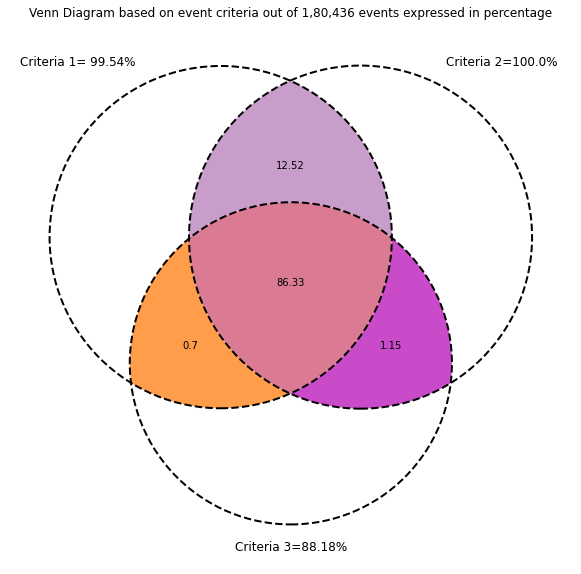

In [36]:
crit1=round(global_terrorismdata[(global_terrorismdata.crit1==1)]['eventid'].count()*100/180436,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit2=round(global_terrorismdata[(global_terrorismdata.crit2==1)]['eventid'].count()*100/180436,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit3=round(global_terrorismdata[(global_terrorismdata.crit3==1)]['eventid'].count()*100/180436,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
print(f'criteria 1 percentage ={crit1}    criteria 2 percentage ={crit2}   criteria 3 percentage ={crit3}')

crit_1_2_3=round(global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1)]['eventid'].count()*100/180436,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_2=round(global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==0)]['eventid'].count()*100/180436,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_3=round(global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit3==1) & (global_terrorismdata.crit2==0)]['eventid'].count()*100/180436,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_2_3=round(global_terrorismdata[(global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1) & (global_terrorismdata.crit1==0)]['eventid'].count()*100/180436,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
#preparation of venn diagram
v=venn3(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,crit_1_2_3), 
      set_labels=('Criteria 1= 99.54%', 'Criteria 2=100.0%', 'Criteria 3=88.18%'), 
      set_colors=("orange", "blue", "red"), alpha=0.7)
v.get_patch_by_id('100').set_color("white")
v.get_label_by_id("100").set_text("")
v.get_patch_by_id('001').set_color("white")
v.get_label_by_id("001").set_text("")
v.get_patch_by_id('010').set_color("white")
v.get_label_by_id("010").set_text("")
venn3_circles(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,crit_1_2_3), 
              linestyle="dashed", linewidth=2)
plt.title("Venn Diagram based on event criteria out of 1,80,436 events expressed in percentage")

plt.show()

Considering event inclusion criteria, 99.54% of events aimed at attaining a political, economic, religious, or social goal with an intention to coerce, intimidate, or convey some other message to a larger audience (or audiences) than the immediate victims.

And moreover 86% of events had all the criteria followed.


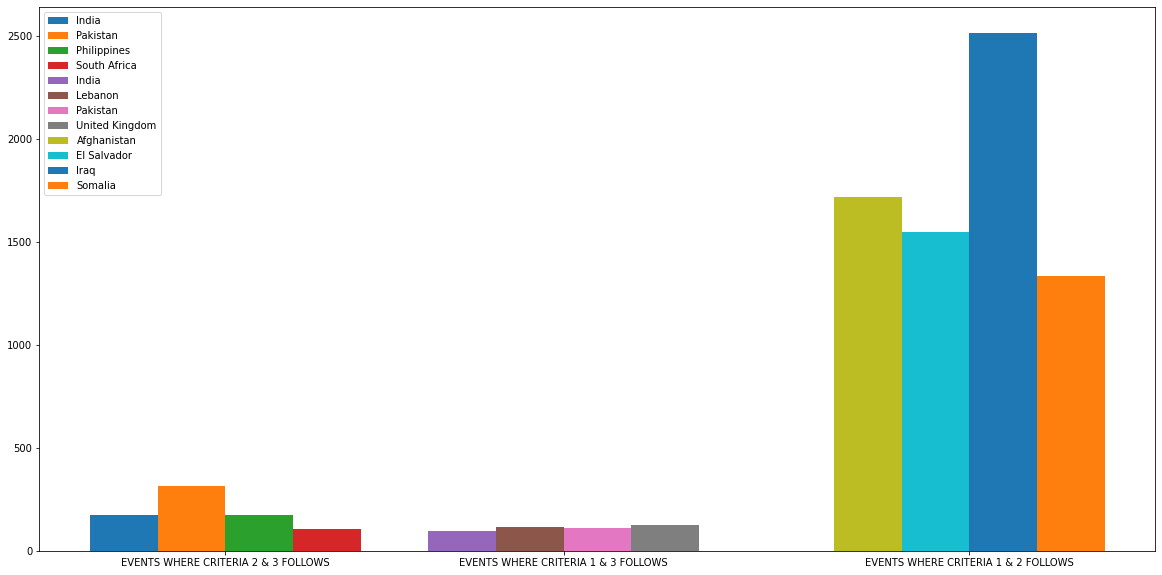

<Figure size 1440x720 with 0 Axes>

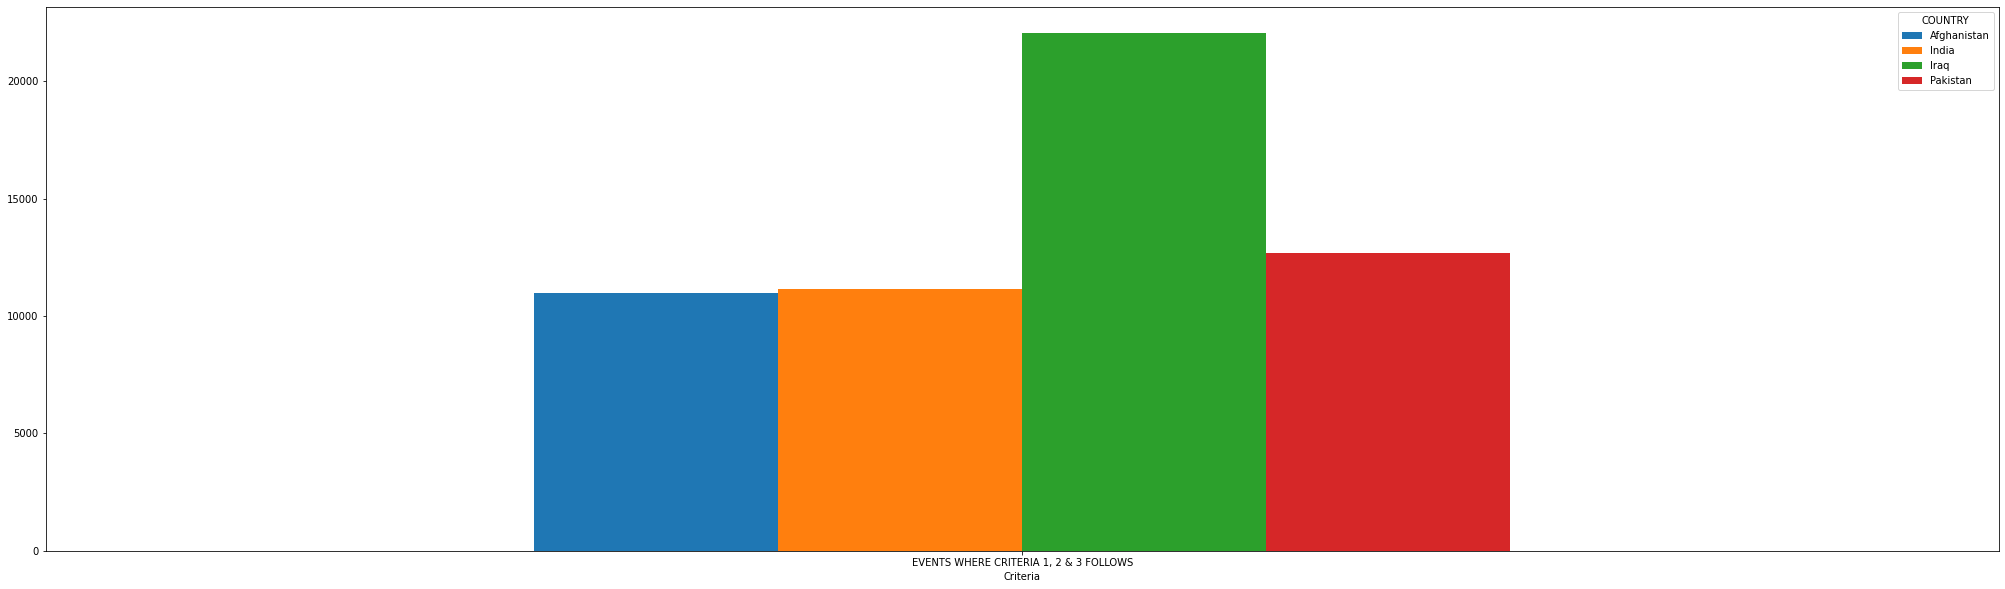

In [37]:
crit2_3_top4=global_terrorismdata[(global_terrorismdata.crit1==0) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1)].groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index().head(4)
crit1_3_top4=global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==0) & (global_terrorismdata.crit3==1)].groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index().head(4)
crit1_2_top4=global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==0)].groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index().head(4)
crit1_2_3_top4=global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1)].groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index().head(4)
crit2_3_top4['Criteria']=0
crit1_3_top4['Criteria']=1
crit1_2_top4['Criteria']=2
crit1_2_3_top4['Criteria']='EVENTS WHERE CRITERIA 1, 2 & 3 FOLLOWS'
ty=pd.concat([crit2_3_top4, crit1_3_top4, crit1_2_top4])
ty=ty.pivot_table(index='Criteria',columns='COUNTRY')
ty.columns = ty.columns.droplevel()
ty=ty.reset_index()
fig = plt.figure(figsize=(20, 10))

#creating multi bar gragh while avaoiding NaN values
# width of bars
width = 1
# create emptly lists for x tick positions and names
x_ticks_pos = []
# counter for helping with x tick positions
count = 0
# go through each row of the dataframe
for idx, row in ty.iterrows():  
    # this will be the first bar position for this row
    count += idx
    # this will be the start of the first bar for this row
    start_idx = count - width / 2
    # this will be the end of the last bar for this row
    end_idx = start_idx
    # for each column in the wanted columns,
    # if the row is not null,
    # add the bar to the plot
    # also update the end position of the bars for this row
    for column in ty.drop(["Criteria"], axis=1).columns:
      if row[column] == row[column]:
            klm=plt.bar(count, row[column], width=width, label=column)
            count += 1
            end_idx += width         
    # this checks if the row had any not NULL value in the desired columns
    # in other words, it checks if there was any bar for this row
    # if yes, add the center of all the row's bars and the row's name (A,B,C) to the respective lists
    if end_idx != start_idx:
        x_ticks_pos.append((end_idx + start_idx) / 2)
# now set the x_ticks
x_ticks = ['EVENTS WHERE CRITERIA 2 & 3 FOLLOWS', 'EVENTS WHERE CRITERIA 1 & 3 FOLLOWS', 'EVENTS WHERE CRITERIA 1 & 2 FOLLOWS']
plt.xticks(x_ticks_pos, x_ticks)
# plot the legends
plt.legend()
plt.show()
plt.figure(figsize=(20, 10))
yu=crit1_2_3_top4.pivot_table(index='Criteria',columns='COUNTRY')
yu.columns = yu.columns.droplevel()
yu.plot.bar(rot=0)


# **2.3 Analysis based on target types**

In [38]:
#pie chart on target type
target_type_piechart=px.pie(global_terrorismdata.groupby('TARGET TYPE')['No.of attacks'].count().reset_index(), 
          values='No.of attacks',
          names='TARGET TYPE',
          title='Total number of attacks interms of target type')
target_type_piechart.show()

REMARKS:

Private citizens, property, military, police, government and business constitute 75% of the total


In [40]:
#Treemap visualisation of target types and country with respect to number of attacks
treemap_target_type=px.treemap(data_frame=global_terrorismdata,
                     values='No.of attacks',
                     path=['TARGET TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on target types and country in terms of number of attacks',)
treemap_target_type.show()
#Treemap visualisation of organisation interms of target types with respect to number of casualities
treemap_target_type1=px.treemap(data_frame=global_terrorismdata,
                     values='CASUALTY',
                     path=['TARGET TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on target types and country in terms of number of attacks',)
treemap_target_type1.show()

REMARKS:

Private citizen & property of Iraq, Nigeria and USA are the most affected

Military of Iraq, Afghanistan and El Salvador are most affected

Police of Iraq, Afghanistan and India are most affected

Business of Iraq, Pakistan and India are most affected

Government of Iraq Afghanistan and Pakistan are most affected

# 2.4 Analysis based on Attack types

In [41]:
#pie chart on attack type
attack_type_piechart=px.pie(global_terrorismdata.groupby('ATTACK TYPE')['No.of attacks'].count().reset_index(), 
          values='No.of attacks',
          names='ATTACK TYPE',
          title='Total number of attacks interms of attack type')
attack_type_piechart.show()

REMARKS:

Most preferred attack type is bombing/Explosion followed by armed assault

In [45]:
#Creating dataframe based on attack type
ATTACK_TYPE_data=global_terrorismdata.groupby('ATTACK TYPE')['No.of attacks'].count().reset_index()
ATTACK_TYPE_data_success=global_terrorismdata.groupby('ATTACK TYPE')['SUCCESS'].sum().reset_index()
ATTACK_TYPE_data_casualty=global_terrorismdata.groupby('ATTACK TYPE')['CASUALTY'].sum().reset_index()
ATTACK_TYPE_data['SUCCESS']=ATTACK_TYPE_data_success.SUCCESS
ATTACK_TYPE_data['CASUALTY']=ATTACK_TYPE_data_casualty.CASUALTY
ATTACK_TYPE_data['PERCENTAGE']=ATTACK_TYPE_data['SUCCESS']*100/ATTACK_TYPE_data['No.of attacks']
ATTACK_TYPE_data.sort_values(by='No.of attacks',ascending=False)

display(ATTACK_TYPE_data.sort_values(by='PERCENTAGE',ascending=False))
#Creating bar graph from above dataframe
px.bar(data_frame=ATTACK_TYPE_data.sort_values(by='PERCENTAGE',ascending=False),
                  
                  x='PERCENTAGE',y='ATTACK TYPE',
                  hover_data=['CASUALTY'],color='CASUALTY',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='ATTACK TYPE AND THERE SUCCESS PERCENTAGE')

ATTACK TYPE  No.of attacks  SUCCESS  CASUALTY  \
5  Hostage Taking (Barricade Incident)            991      983    8444.0   
6          Hostage Taking (Kidnapping)          11158    10907   30677.0   
0                        Armed Assault          42669    40345  237663.0   
3       Facility/Infrastructure Attack          10356     9779    7407.0   
4                            Hijacking            659      579   20719.0   
2                    Bombing/Explosion          88255    77530  530007.0   
7                      Unarmed Assault           1015      879   14907.0   
8                              Unknown           7276     6015   47106.0   
1                        Assassination          19312    14615   38807.0   

   PERCENTAGE  
5   99.192735  
6   97.750493  
0   94.553423  
3   94.428351  
4   87.860395  
2   87.847714  
7   86.600985  
8   82.669049  
1   75.678335

REMARKS:

Hostage Taking (Barricade Incident) had the highest success rate of 99.1% and assassination had the lowest success rate of 75%

In [47]:
#Treemap visualisation of attack types and country with respect to number of attacks
treemap_attack_type=px.treemap(data_frame=global_terrorismdata,
                     values='No.of attacks',
                     path=['ATTACK TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on attack types and country in terms of number of attacks',)
treemap_attack_type.show()
#Treemap visualisation of organisation interms of attack types with respect to number of casualities
treemap_attack_type1=px.treemap(data_frame=global_terrorismdata,
                     values='CASUALTY',
                     path=['ATTACK TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on attack types and country in terms of number of casualties',)
treemap_attack_type1.show()


# 2.5 Analysis based on weapon types

In [48]:
#pie chart on weapon type
attack_type_piechart=px.pie(global_terrorismdata.groupby('WEAPON TYPE')['No.of attacks'].count().reset_index(), 
          values='No.of attacks',
          names='WEAPON TYPE',
          title='Total number of attacks interms of weapon type')
attack_type_piechart.show()

REMARKS:
•	Explosives is the most preferred weapon type which constituted 51% followed by firearms 32%

In [50]:
#Creating dataframe based on weapon type
WEAPON_TYPE_data=global_terrorismdata.groupby('WEAPON TYPE')['No.of attacks'].count().reset_index()
WEAPON_TYPE_data_success=global_terrorismdata.groupby('WEAPON TYPE')['SUCCESS'].sum().reset_index()
WEAPON_TYPE_data_casualty=global_terrorismdata.groupby('WEAPON TYPE')['CASUALTY'].sum().reset_index()
WEAPON_TYPE_data['SUCCESS']=WEAPON_TYPE_data_success.SUCCESS
WEAPON_TYPE_data['CASUALTY']=WEAPON_TYPE_data_casualty.CASUALTY
WEAPON_TYPE_data['PERCENTAGE']=WEAPON_TYPE_data['SUCCESS']*100/WEAPON_TYPE_data['No.of attacks']
WEAPON_TYPE_data.sort_values(by='No.of attacks',ascending=False)

display(WEAPON_TYPE_data.sort_values(by='PERCENTAGE',ascending=False))
#Creating bar graph w.r.t weapon type
px.bar(data_frame=WEAPON_TYPE_data.sort_values(by='PERCENTAGE',ascending=False),
                  
                  x='PERCENTAGE',y='WEAPON TYPE',
                  hover_data=['CASUALTY'],color='CASUALTY',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='WEAPON TYPE AND THERE SUCCESS PERCENTAGE')

WEAPON TYPE  No.of attacks  SUCCESS  \
9                                  Sabotage Equipment            141      133   
5                                          Incendiary          11135    10472   
4                                            Firearms          58524    54090   
6                                               Melee           3655     3286   
10                                            Unknown          15157    13420   
2                                          Explosives          92426    79746   
11  Vehicle (not to include vehicle-borne explosiv...            136      117   
7                                               Other            114       90   
1                                            Chemical            321      243   
3                                        Fake Weapons             33       18   
0                                          Biological             35       15   
8                                        Radiological             14        2   

    CASUALTY  PERCENTAGE  
9      369.0   94.326241  
5    11006.0   94.045802  
4   252113.0   92.423621  
6    16070.0   89.904241  
10   60195.0   88.539949  
2   560181.0   86.280917  
11   20305.0   86.029412  
7      228.0   78.947368  
1    14449.0   75.700935  
3        1.0   54.545455  
0      814.0   42.857143  
8        6.0   14.285714

REMARKS:

•	Sabotage equipment out of 141 attacks and incendiary out of 11135 attacks had the highest success rate of 94%.

In [52]:
#Treemap visualisation of weapon types and country with respect to number of attacks
treemap_weapon_type=px.treemap(data_frame=global_terrorismdata,
                     values='No.of attacks',
                     path=['WEAPON TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on weapon types and country in terms of number of attacks',)
treemap_weapon_type.show()
#Treemap visualisation of organisation interms of weapon types with respect to number of casualities
treemap_weapon_type1=px.treemap(data_frame=global_terrorismdata,
                     values='CASUALTY',
                     path=['WEAPON TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on weapon types and country in terms of number of casualties',)
treemap_weapon_type1.show()


REMARKS:

In case of Explosives Iraq had highest number of attacks and casualties

In case of firearms pakistan had highest number of attacks and Afghanistan had highest number of casualties

In case of incendiary India had highest number of attacks and Iraq had highest number of casualties

In case of vehicle West Bank and Gaza strip had highest attacks and USA had highest number of casualties

# **2. ANALYSING GLOBAL TERROR EVENTS INTERMS OF ORGANISATION**

In [53]:
organisation_data=global_terrorismdata.groupby('ORGANISATION')['No.of attacks'].count().reset_index()#Creating dataframe for each oraganisation and corresponding number of attacks
organisation_data['Attack successful']=global_terrorismdata.groupby('ORGANISATION')['SUCCESS'].sum().reset_index()['SUCCESS']#Creating coloumn of successfull number of attacks
organisation_data['No.of attacks percentage']=organisation_data['No.of attacks']*100/global_terrorismdata['No.of attacks'].count()#Creating coloumn  number of attacks percentage
organisation_data['Success percentage']=organisation_data['Attack successful']*100/organisation_data['No.of attacks']#Creating coloumn of successfull number of attacks percentage
organisation_data['CASUALTIES']=global_terrorismdata.groupby('ORGANISATION')['CASUALTY'].sum().reset_index()['CASUALTY']#Creating coloumn of  number of casualty
organisation_data['CASUALTIES PERCENTAGE']=organisation_data['CASUALTIES']*100/global_terrorismdata['CASUALTY'].sum()#Creating coloumn of  casualty percentage
organisation_data['Casuality to Attack ratio']=organisation_data['CASUALTIES']/organisation_data['No.of attacks']#Creating coloumn of  casualty to attack ratio
lj=organisation_data.sort_values(by='No.of attacks percentage',ascending=False)#creating a temp dataframe for further use

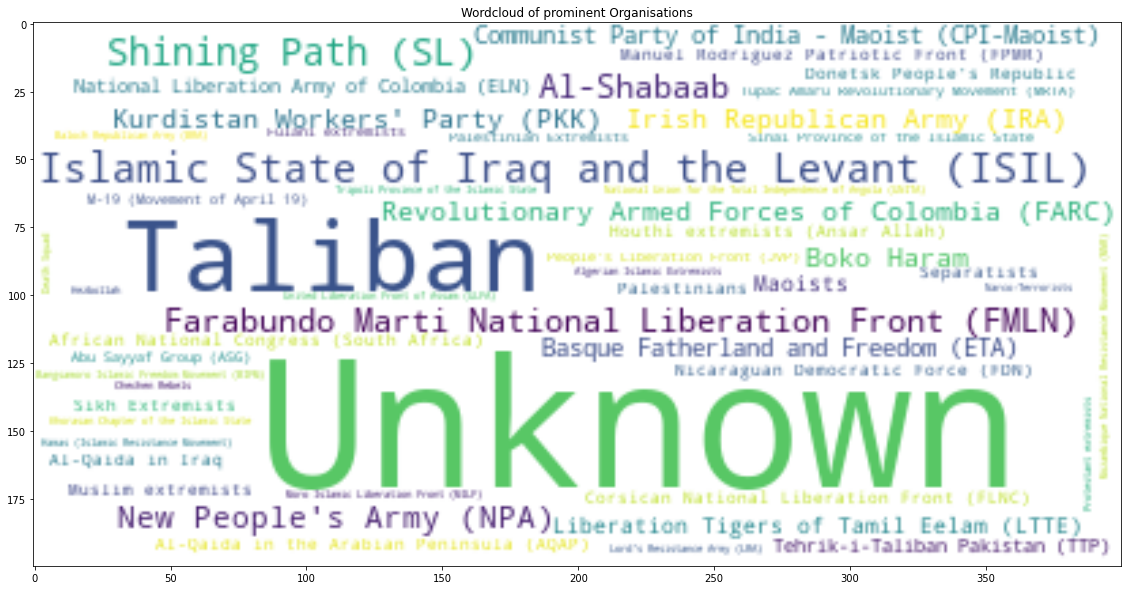

In [54]:
#creating world cloud of organisations
global_organisation_dict={}
for group,attacks in zip(organisation_data.ORGANISATION,organisation_data['No.of attacks']):
  global_organisation_dict[group]=attacks
wordcloud = WordCloud(background_color='white',collocations=False)
wordcloud.generate_from_frequencies(frequencies=global_organisation_dict) #using the dictionary created earlier
plt.figure(figsize=(30,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Wordcloud of prominent Organisations')
plt.axis("on")
plt.show()

Here analysis was made on events based on the organizations involved giving weightage to the number of attacks. The organization behind 45% of the events is registered as unknown so further analysis was made on the remaining 55%, below mentioned are some of the key findings and visualizations, 

In [55]:
organisation_data_top_20=lj[lj.ORGANISATION!='Unknown'].sort_values(by='No.of attacks',ascending=False).head(20)
#top 20 organisation without excluding unkown
display(organisation_data_top_20)

ORGANISATION  No.of attacks  \
3138                                           Taliban           7478   
1535       Islamic State of Iraq and the Levant (ISIL)           5613   
2948                                 Shining Path (SL)           4555   
1120  Farabundo Marti National Liberation Front (FMLN)           3351   
177                                         Al-Shabaab           3288   
2266                           New People's Army (NPA)           2772   
1484                       Irish Republican Army (IRA)           2671   
2717     Revolutionary Armed Forces of Colombia (FARC)           2487   
704                                         Boko Haram           2418   
1800                    Kurdistan Workers' Party (PKK)           2310   
617                Basque Fatherland and Freedom (ETA)           2024   
888     Communist Party of India - Maoist (CPI-Maoist)           1878   
1963                                           Maoists           1630   
1864           Liberation Tigers of Tamil Eelam (LTTE)           1606   
2201        National Liberation Army of Colombia (ELN)           1561   
3165                   Tehrik-i-Taliban Pakistan (TTP)           1351   
2390                                      Palestinians           1125   
1394                   Houthi extremists (Ansar Allah)           1062   
169           Al-Qaida in the Arabian Peninsula (AQAP)           1020   
2276                 Nicaraguan Democratic Force (FDN)            895   

      Attack successful  No.of attacks percentage  Success percentage  \
3138               6680                  4.115779           89.328698   
1535               4759                  3.089311           84.785320   
2948               4337                  2.507004           95.214050   
1120               3317                  1.844340           98.985377   
177                3016                  1.809666           91.727494   
2266               2457                  1.525667           88.636364   
1484               2282                  1.470078           85.436166   
2717               2302                  1.368807           92.561319   
704                2247                  1.330831           92.928040   
1800               2175                  1.271389           94.155844   
617                1721                  1.113979           85.029644   
888                1774                  1.033623           94.462194   
1963               1309                  0.897128           80.306748   
1864               1530                  0.883918           95.267746   
2201               1470                  0.859151           94.170404   
3165               1267                  0.743570           93.782383   
2390                903                  0.619183           80.266667   
1394                896                  0.584509           84.369115   
169                 900                  0.561393           88.235294   
2276                886                  0.492595           98.994413   

      CASUALTIES  CASUALTIES PERCENTAGE  Casuality to Attack ratio  
3138     57342.0               6.128004                   7.668093  
1535     69595.0               7.437453                  12.398895  
2948     14632.0               1.563687                   3.212294  
1120     12130.0               1.296304                   3.619815  
177      16954.0               1.811834                   5.156326  
2266      7719.0               0.824911                   2.784632  
1484      5462.0               0.583711                   2.044927  
2717     10015.0               1.070279                   4.026940  
704      29801.0               3.184762                  12.324648  
1800      9863.0               1.054035                   4.269697  
617       3164.0               0.338129                   1.563241  
888       4009.0               0.428432                   2.134718  
1963      3036.0               0.324450                   1.862577  
1864    

In [56]:
#Treemap based on organisation and country  in terms of number of attacks
treemap=px.treemap(data_frame=global_terrorismdata[global_terrorismdata.ORGANISATION!='Unknown'],
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation and country  in terms of number of attacks',)
treemap.show()
#Treemap based on Country and organisation in terms of number of attacks
treemap=px.treemap(data_frame=global_terrorismdata[global_terrorismdata.ORGANISATION!='Unknown'],
           values='No.of attacks',
           path=['COUNTRY','ORGANISATION',],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on Country and organisation in terms of number of attacks',)
treemap.show()

REMARKS:

•	The organization with the most number of attacks is the Taliban at 4% of total events.

•	The organization with the most number of casualties is the ISIL at 7.5% of total casualties

•	LTTE had highest casualty to attack ratio of 13


In [57]:
#Treemap based on target type and organisation in terms of number of attacks
treemap=px.treemap(data_frame=global_terrorismdata[global_terrorismdata.ORGANISATION!='Unknown'],
           values='No.of attacks',
           path=['TARGET TYPE','ORGANISATION'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on target type and organisation in terms of number of attacks')
treemap.show()

REMARKS:

Private citizen & property is mostly targetted by ISIL

Military is mostly targetted by Taliban

Police is mostly targetted by Taliban

Business is mostly targetted by SL

Government is mostly targetted by Taliban

In [58]:
#Creating dataframe top 20 countries in terms of organizations within it
Temp=global_terrorismdata.groupby(['COUNTRY','ORGANISATION'])['No.of attacks'].sum().reset_index()
org_within_country=Temp.groupby('COUNTRY')['ORGANISATION'].count().reset_index()
org_within_country['No.of attacks']=global_terrorismdata.groupby(['COUNTRY'])['No.of attacks'].sum().reset_index()['No.of attacks']

#Bar graph of top 20 countries in terms of organizations within it
px.bar(data_frame=org_within_country.sort_values(by='ORGANISATION',ascending=False).head(20),
                  width=1500,height=800,
                  x='ORGANISATION',y='COUNTRY',
                  hover_data=['No.of attacks'],color='No.of attacks',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='TOP 20 COUNTRIES IN TERMS OF NUMBER OF ORGANIZATION WITHIN IT WITH RESPECT TO NUMBER OF ATTACKS ')

REMARKS:

India had most number of organisation within it with 300 organisations followed by USA

In [59]:
#TOP 20 ORGANISATION IN TERMS OF NUMBER OF COUNTRIES ATTACKED WITH RESPECT TO NUMBER OF ATTACKS
temp=global_terrorismdata[global_terrorismdata.ORGANISATION!='Unknown'].groupby(['ORGANISATION','COUNTRY'])['No.of attacks'].count().reset_index()
country_within_org=temp.groupby(['ORGANISATION'])['COUNTRY'].count().reset_index()
country_within_org['No.of attacks']=global_terrorismdata.groupby(['ORGANISATION'])['No.of attacks'].count().reset_index()['No.of attacks']
#Bar graph of top 20 organizations in terms of number of countries attacked
px.bar(data_frame=country_within_org.sort_values(by='COUNTRY',ascending=False).head(20),
                  width=1500,height=800,
                  x='COUNTRY',y='ORGANISATION',
                  hover_data=['No.of attacks'],color='No.of attacks',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='TOP 20 ORGANISATION IN TERMS OF NUMBER OF COUNTRIES ATTACKED WITH RESPECT TO NUMBER OF ATTACKS ')

REMARKS:

•	The organization which attacked most countries is Muslim Extremist (51 countries)

In [60]:
#Treemap based on attack type and organisation in terms of number of attacks
treemap=px.treemap(data_frame=global_terrorismdata[global_terrorismdata.ORGANISATION!='Unknown'],
           values='No.of attacks',
           path=['ATTACK TYPE','ORGANISATION'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on attack type and organisation in terms of number of attacks')
treemap.show()

REMARKS:

In case of bombing/Explosion, ISIL had highest number of attacks.

In case of Armed assault, Taliban followed by FMLN.

In case of assassination, IRA followed by SL

In case of Hostage taking, Taliban followed by ISIL

In case of Facility/Infrastructure ,NPA followed by IRA

In case of Hijacking , Al-Shabaab followed by NPA

In [61]:
# BAR PLOT OF TOP 20 ORGANISATION AND THERE SUCCESS PERCENTAGE
px.bar(data_frame=organisation_data[organisation_data.ORGANISATION!='Unknown'].sort_values(by='No.of attacks',ascending=False).head(20).sort_values(by='Success percentage',ascending=False),
                  width=1500,height=800,
                  x='Success percentage',y='ORGANISATION',
                  hover_data=['CASUALTIES'],color='CASUALTIES',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='ORGANISATION AND THERE SUCCESS PERCENTAGE')

REMARKS:

Considering the top 20 organizations in terms of the number of attacks, all the organizations had a success percentage above 80% with Farabundo Marti National Liberation Front (FMLN) topping the chart with 98% out of 3351 attacks while the Taliban having 89% and ISIL having 84%.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



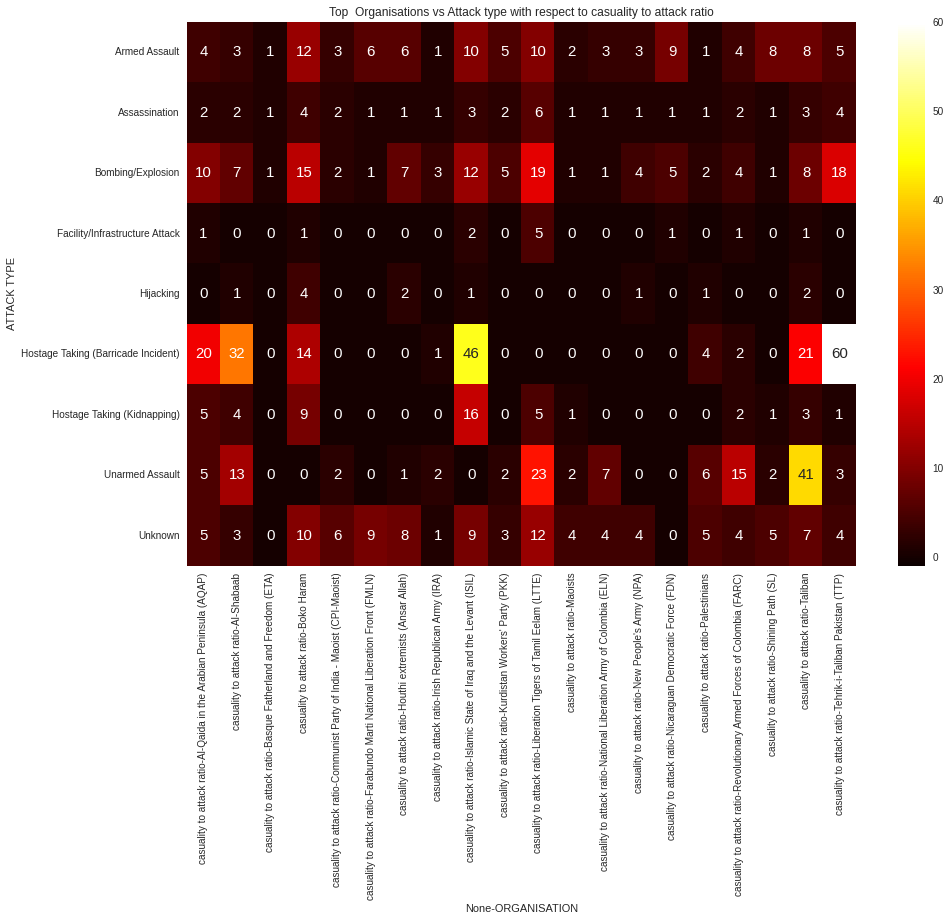

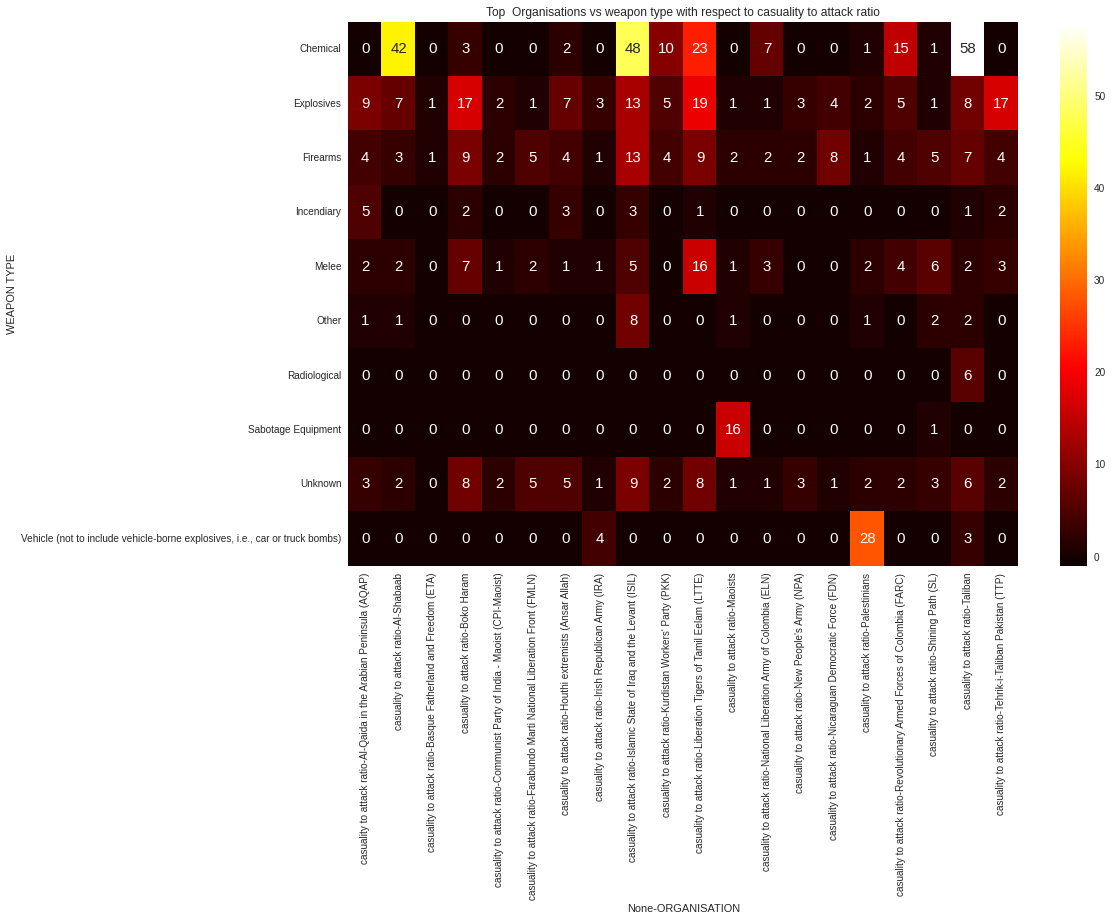

In [62]:
#Top  Organisations vs Attack type with respect to casuality to attack ratio
temp=global_terrorismdata[global_terrorismdata['ORGANISATION'].isin(list(organisation_data_top_20['ORGANISATION']))] 
temp['casuality to attack ratio']=temp['CASUALTY']/temp['No.of attacks']
c_to_a_attack_type=temp.sort_values('No.of attacks',ascending=False)
#grouping the resulting df by organisation and weapon types
c_to_a_attack_type=c_to_a_attack_type.groupby(['ORGANISATION','ATTACK TYPE'])['casuality to attack ratio'].mean().reset_index()

#sorting the resulting df by casualty to attack ratio
c_to_a_attack_type.sort_values('casuality to attack ratio',ascending=False,inplace=True)

c_to_a_attack_type_pivot=c_to_a_attack_type.pivot_table(index='ATTACK TYPE',columns='ORGANISATION')
c_to_a_attack_type_pivot.fillna(0,inplace=True)
c_to_a_attack_type_pivot=c_to_a_attack_type_pivot.astype(int)
plt.style.use('seaborn')
#generating heat map
colormap =sns.color_palette('hot', as_cmap=True)   
plt.figure(figsize=(15,10))
plt.title('Top  Organisations vs Attack type with respect to casuality to attack ratio')
sns.heatmap(c_to_a_attack_type_pivot, vmin=-1, cmap=colormap, annot=True,fmt='d', annot_kws={'size':15})


#Top  Organisations vs weapon type with respect to casuality to attack ratio
temp=global_terrorismdata[global_terrorismdata['ORGANISATION'].isin(list(organisation_data_top_20['ORGANISATION']))] 
temp['casuality to attack ratio']=temp['CASUALTY']/temp['No.of attacks']
c_to_a_weapon_type=temp.sort_values('No.of attacks',ascending=False)
#grouping the resulting df by organisation and weapon types
c_to_a_weapon_type=c_to_a_weapon_type.groupby(['ORGANISATION','WEAPON TYPE'])['casuality to attack ratio'].mean().reset_index()

#sorting the resulting df by casualty to attack ratio
c_to_a_weapon_type.sort_values('casuality to attack ratio',ascending=False,inplace=True)

c_to_a_weapon_type_pivot=c_to_a_weapon_type.pivot_table(index='WEAPON TYPE',columns='ORGANISATION')
c_to_a_weapon_type_pivot.fillna(0,inplace=True)
c_to_a_weapon_type_pivot=c_to_a_weapon_type_pivot.astype(int)
plt.style.use('seaborn')
#generating heat map
colormap =sns.color_palette('hot', as_cmap=True)   
plt.figure(figsize=(15,10))
plt.title('Top  Organisations vs weapon type with respect to casuality to attack ratio')
sns.heatmap(c_to_a_weapon_type_pivot, vmin=-1, cmap=colormap, annot=True,fmt='d', annot_kws={'size':15})

REMARKS:

•	Highest casualty per attack of 60 was attained by TTP by hostage-taking (barricade incident) and those organization involved in hostage-taking (barricade incident) attained their highest casualty per attack in the same.

•	In the case of the most preferred attack type (bombing/ explosion), LTTE attained the highest value of 19


Analysising organisation with respect to criteria

In [63]:
#Treemap based on organisation & country the events where only criteria 1 and 2 follows
treemap=px.treemap(data_frame=global_terrorismdata[(global_terrorismdata.ORGANISATION!='Unknown')&(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==0)],
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation & country the events where only criteria 1 and 2 follows',)
treemap.show()
#Treemap based on organisation & country the events where only criteria 1 and 3 follows
treemap=px.treemap(data_frame=global_terrorismdata[(global_terrorismdata.ORGANISATION!='Unknown')&(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==0) & (global_terrorismdata.crit3==1)],
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation & country the events where only criteria 1 and 3 follows',)
treemap.show()
#Treemap based on organisation & country the events where only criteria 2 and 3 follows
treemap=px.treemap(data_frame=global_terrorismdata[(global_terrorismdata.ORGANISATION!='Unknown')&(global_terrorismdata.crit1==0) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1)],
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation & country the events where only criteria 2 and 3 follows',)
treemap.show()
#Treemap based on organisation & country the events where only criteria 1,2 and 3 follows
treemap=px.treemap(data_frame=global_terrorismdata[(global_terrorismdata.ORGANISATION!='Unknown')&(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1)],
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation & country the events where only criteria 1,2 and 3 follows',)
treemap.show()

REMARKS:

Events were only criteria 1 & 2 follows,

    Farabundo Marti National Liberation Front (FMLN)-1220 attacks
    Al-Shabaab                                      -1185 attacks
    ISIL                                            -1147 attacks
    Taliban                                         -1077 attacks

Events were only criteria 1 & 3 follows,

    ISIL      - 38 attacks
    IRA       - 34 attacks
    Hezbollah - 32 attacks
    CPI-Maoist- 26 attacks

Events were only criteria 2 & 3 follows,

    Gunmen           - 72 attacks
    Fulani extremist - 16 attacks
    Narco terrorists - 12 attacks
    New People’s Army- 12 attacks

Events were all criterias follows,

    Taliban                                         -6394 attacks
    ISIL                                            -4425 attacks
    Boko Haram                                      -2170 attacks
    Farabundo Marti National Liberation Front (FMLN)-2129 attacks




#Analysising most affected regions i.e, Middle East & North Africa and South Asia

In [64]:
global_terrorismdata_me=global_terrorismdata[global_terrorismdata.REGION=='Middle East & North Africa']#For Middle East & North Africa
global_terrorismdata_sa=global_terrorismdata[global_terrorismdata.REGION=='South Asia']#For Middle East & North Africa
global_terrorismdata_rest=global_terrorismdata[(global_terrorismdata.REGION!='Middle East & North Africa')&(global_terrorismdata.REGION!='South Asia')]#For rest of the world
organisation_data_me=global_terrorismdata_me.groupby('ORGANISATION')['No.of attacks'].count().reset_index()
organisation_data_sa=global_terrorismdata_sa.groupby('ORGANISATION')['No.of attacks'].count().reset_index()

#Creating organisation data for Middle East & North Africa
organisation_data_me['Attack successful']=global_terrorismdata_me.groupby('ORGANISATION')['SUCCESS'].sum().reset_index()['SUCCESS']#Creating coloumn of successfull number of attacks
organisation_data_me['No.of attacks percentage']=organisation_data_me['No.of attacks']*100/global_terrorismdata_me['No.of attacks'].count()#Creating coloumn  number of attacks percentage
organisation_data_me['Success percentage']=organisation_data_me['Attack successful']*100/organisation_data_me['No.of attacks']#Creating coloumn of successfull number of attacks percentage
organisation_data_me['CASUALTIES']=global_terrorismdata_me.groupby('ORGANISATION')['CASUALTY'].sum().reset_index()['CASUALTY']#Creating coloumn of  number of casualty
organisation_data_me['CASUALTIES PERCENTAGE']=organisation_data_me['CASUALTIES']*100/global_terrorismdata_me['CASUALTY'].sum()#Creating coloumn of  casualty percentage
organisation_data_me['Casuality to Attack ratio']=organisation_data_me['CASUALTIES']/organisation_data_me['No.of attacks']#Creating coloumn of  casualty to attack ratio
mej=organisation_data_me.sort_values(by='No.of attacks percentage',ascending=False)#creating a temp dataframe for further use

#Creating organisation data for South Asia
organisation_data_sa['Attack successful']=global_terrorismdata_sa.groupby('ORGANISATION')['SUCCESS'].sum().reset_index()['SUCCESS']#Creating coloumn of successfull number of attacks
organisation_data_sa['No.of attacks percentage']=organisation_data_sa['No.of attacks']*100/global_terrorismdata_sa['No.of attacks'].count()#Creating coloumn  number of attacks percentage
organisation_data_sa['Success percentage']=organisation_data_sa['Attack successful']*100/organisation_data_sa['No.of attacks']#Creating coloumn of successfull number of attacks percentage
organisation_data_sa['CASUALTIES']=global_terrorismdata_sa.groupby('ORGANISATION')['CASUALTY'].sum().reset_index()['CASUALTY']#Creating coloumn of  number of casualty
organisation_data_sa['CASUALTIES PERCENTAGE']=organisation_data_sa['CASUALTIES']*100/global_terrorismdata_sa['CASUALTY'].sum()#Creating coloumn of  casualty percentage
organisation_data_sa['Casuality to Attack ratio']=organisation_data_sa['CASUALTIES']/organisation_data_sa['No.of attacks']#Creating coloumn of  casualty to attack ratio
saj=organisation_data_sa.sort_values(by='No.of attacks percentage',ascending=False)#creating a temp dataframe for further use

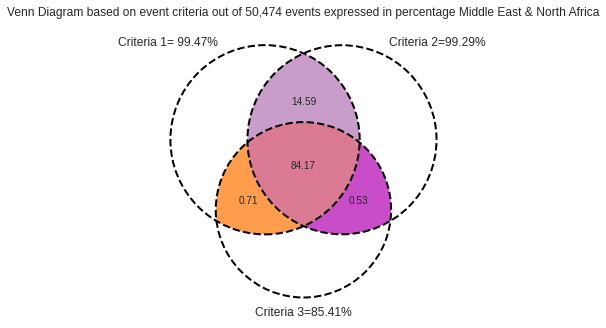

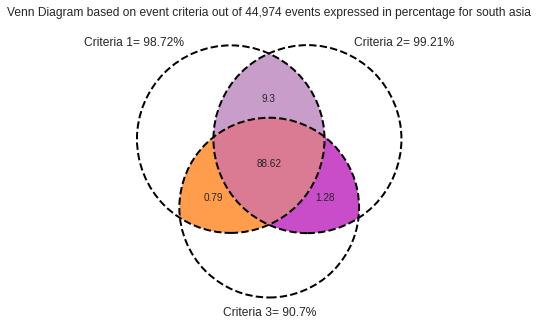

In [65]:
#Venn Diagram based on event criteria out of 50,474 events expressed in percentage Middle East & North Africa
crit1=round(global_terrorismdata_me[(global_terrorismdata_me.crit1==1)]['eventid'].count()*100/50474,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit2=round(global_terrorismdata_me[(global_terrorismdata_me.crit2==1)]['eventid'].count()*100/50474,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit3=round(global_terrorismdata_me[(global_terrorismdata_me.crit3==1)]['eventid'].count()*100/50474,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_2_3=round(global_terrorismdata_me[(global_terrorismdata_me.crit1==1) & (global_terrorismdata_me.crit2==1) & (global_terrorismdata_me.crit3==1)]['eventid'].count()*100/50474,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_2=round(global_terrorismdata_me[(global_terrorismdata_me.crit1==1) & (global_terrorismdata_me.crit2==1) & (global_terrorismdata_me.crit3==0)]['eventid'].count()*100/50474,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_3=round(global_terrorismdata_me[(global_terrorismdata_me.crit1==1) & (global_terrorismdata_me.crit3==1) & (global_terrorismdata_me.crit2==0)]['eventid'].count()*100/50474,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_2_3=round(global_terrorismdata_me[(global_terrorismdata_me.crit2==1) & (global_terrorismdata_me.crit3==1) & (global_terrorismdata_me.crit1==0)]['eventid'].count()*100/50474,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
v=venn3(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,crit_1_2_3), 
      set_labels=('Criteria 1= 99.47%', 'Criteria 2=99.29%', 'Criteria 3=85.41%'), 
      set_colors=("orange", "blue", "red"), alpha=0.7)
v.get_patch_by_id('100').set_color("white")
v.get_label_by_id("100").set_text("")
v.get_patch_by_id('001').set_color("white")
v.get_label_by_id("001").set_text("")
v.get_patch_by_id('010').set_color("white")
v.get_label_by_id("010").set_text("")
venn3_circles(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,crit_1_2_3), 
              linestyle="dashed", linewidth=2)
plt.title("Venn Diagram based on event criteria out of 50,474 events expressed in percentage Middle East & North Africa")
plt.show()







#Venn Diagram based on event criteria out of 44,974 events expressed in percentage for south asia
crit1=round(global_terrorismdata_sa[(global_terrorismdata_sa.crit1==1)]['eventid'].count()*100/44974,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit2=round(global_terrorismdata_sa[(global_terrorismdata_sa.crit2==1)]['eventid'].count()*100/44974,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit3=round(global_terrorismdata_sa[(global_terrorismdata_sa.crit3==1)]['eventid'].count()*100/44974,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_2_3=round(global_terrorismdata_sa[(global_terrorismdata_sa.crit1==1) & (global_terrorismdata_sa.crit2==1) & (global_terrorismdata_sa.crit3==1)]['eventid'].count()*100/44974,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_2=round(global_terrorismdata_sa[(global_terrorismdata_sa.crit1==1) & (global_terrorismdata_sa.crit2==1) & (global_terrorismdata_sa.crit3==0)]['eventid'].count()*100/44974,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_3=round(global_terrorismdata_sa[(global_terrorismdata_sa.crit1==1) & (global_terrorismdata_sa.crit3==1) & (global_terrorismdata_sa.crit2==0)]['eventid'].count()*100/44974,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_2_3=round(global_terrorismdata_sa[(global_terrorismdata_sa.crit2==1) & (global_terrorismdata_sa.crit3==1) & (global_terrorismdata_sa.crit1==0)]['eventid'].count()*100/44974,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
v=venn3(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,crit_1_2_3), 
      set_labels=('Criteria 1= 98.72%', 'Criteria 2= 99.21%', 'Criteria 3= 90.7%'), 
      set_colors=("orange", "blue", "red"), alpha=0.7)#Venn diagram
v.get_patch_by_id('100').set_color("white")
v.get_label_by_id("100").set_text("")
v.get_patch_by_id('001').set_color("white")
v.get_label_by_id("001").set_text("")
v.get_patch_by_id('010').set_color("white")
v.get_label_by_id("010").set_text("")
venn3_circles(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,crit_1_2_3), 
              linestyle="dashed", linewidth=2)
plt.title("Venn Diagram based on event criteria out of 44,974 events expressed in percentage for south asia")
plt.show()

REMARKS:

Considering event inclusion criteria, 

99.47% of events in Middle East & North Africa and 98.72 of events in South Asia aimed at attaining a political, economic, religious, or social goal with an intention to coerce, intimidate, or convey some other message to a larger audience (or audiences) than the immediate victims.

And moreover 84% of events in Middle East & North Africa and 88.62 of events in South Asia had all the criteria followed

In [66]:
# Creating year wise stats pertaining to Middle East and North Africa
temp_me=global_terrorismdata_me.groupby('YEAR')['No.of attacks'].count().reset_index()
df_me=temp_me.iloc[1: , :].reset_index()
df_me['previous year']=temp_me['No.of attacks']
df_me['PERCENTAGE CHANGE']=(df_me['No.of attacks']-df_me['previous year'])*100/df_me['previous year']
a=df_me['PERCENTAGE CHANGE'].sum()/df_me['PERCENTAGE CHANGE'].count()
print(f'Average percentage change when considering Middle East and North Africa is {a}')
df_me['YEAR'] = df_me["YEAR"].map(str)


# Creating year wise stats pertaining to South Asia 
temp_sa=global_terrorismdata_sa.groupby('YEAR')['No.of attacks'].count().reset_index()
df_sa=temp_sa.iloc[1: , :].reset_index()
df_sa['previous year']=temp_sa['No.of attacks']
df_sa['PERCENTAGE CHANGE']=(df_sa['No.of attacks']-df_sa['previous year'])*100/df_sa['previous year']
a=df_sa['PERCENTAGE CHANGE'].sum()/df_sa['PERCENTAGE CHANGE'].count()
print(f'Average percentage change when considering South Asia is {a}')
df_sa['YEAR'] = df_sa["YEAR"].map(str)

# Creating year wise stats pertaining to Rest of the world 
temp_rest=global_terrorismdata_rest.groupby('YEAR')['No.of attacks'].count().reset_index()
df_rest=temp_rest.iloc[1: , :].reset_index()
df_rest['previous year']=temp_rest['No.of attacks']
df_rest['PERCENTAGE CHANGE']=(df_rest['No.of attacks']-df_rest['previous year'])*100/df_rest['previous year']
a=df_rest['PERCENTAGE CHANGE'].sum()/df_rest['PERCENTAGE CHANGE'].count()
print(f'Average percentage change when considering rest the world is {a}')
df_rest['YEAR'] = df_rest["YEAR"].map(str)


# Creating year wise stats pertaining to for all the above three regions
stats_data=df_me
stats_data.rename(columns = {'No.of attacks':'No.of attacks ME','previous year':'previous year ME','PERCENTAGE CHANGE':'PERCENTAGE CHANGE ME'}, inplace = True)
stats_data['No.of attacks sa']=df_sa['No.of attacks']
stats_data['previous year sa']=df_sa['previous year']
stats_data['PERCENTAGE CHANGE SA']=df_sa['PERCENTAGE CHANGE']
stats_data['No.of attacks rest']=df_rest['No.of attacks']
stats_data['previous year rest']=df_rest['previous year']
stats_data['PERCENTAGE CHANGE REST']=df_rest['PERCENTAGE CHANGE']


# Creating bar plot w.r.t percentage change
change_wise=px.bar(data_frame=stats_data,y=['PERCENTAGE CHANGE ME','PERCENTAGE CHANGE SA','PERCENTAGE CHANGE REST'],x='YEAR',title='YEAR WISE PERCENTAGE CHANGE IN NUMBER OF ATACKS')
change_wise.show()
# Creating bar plot w.r.t number of attacks
change_wise=px.bar(data_frame=stats_data,y=['No.of attacks ME','No.of attacks sa','No.of attacks rest'],x='YEAR',title='YEAR WISE PERCENTAGE CHANGE IN NUMBER OF ATACKS')
change_wise.show()

Average percentage change when considering Middle East and North Africa is 24.975902487318145
Average percentage change when considering South Asia is 63.79799628742491
Average percentage change when considering rest the world is 9.621652463901832


REMARKS:

In the case of the Middle East & North Africa,

•	The highest number of events happened in the year 2014(6939 events) and the minimum in 1973(19 events)
•	The highest percentage change was witnessed in the year 1977 (284%) and the lowest in the year 1973 (-64%)


In the case of South Asia,

•	The highest number of events happened in the year 2013(4998 events) and did not witness any event till 1977

•	The highest percentage change was witnessed in the year 1978 (1600%) and the minimum in the year 1997 (-72%)

**The overall average percentage change for the Middle East & North Africa is    25% and that of South Asia is 63% as compared to the global average of 10%**


In [67]:
#Pie diagram on number of attacks in top affected regions
Me=pd.DataFrame(global_terrorismdata_me.groupby('COUNTRY')['No.of attacks'].count().reset_index())#For Middle East & North Africa
Me_pie=px.pie(Me, values='No.of attacks',names='COUNTRY',title='TOTAL NUMBER OF ATTACKS IN THE MIDDLE EAST & NORTH AFRICA REGION COUNTRY WISE')
Me_pie.update_traces(textposition='inside', textinfo='percent+label')
Me_pie.show()
Sa=pd.DataFrame(global_terrorismdata_sa.groupby('COUNTRY')['No.of attacks'].count().reset_index())#For South asia
Sa_pie=px.pie(Sa, values='No.of attacks',names='COUNTRY',title='TOTAL NUMBER OF ATTACKS IN THE SOUTH ASIAN REGION COUNTRY WISE')
Sa_pie.update_traces(textposition='inside', textinfo='percent+label')
Sa_pie.show()

REMARKS:

•	While considering events in the Middle East & North Africa around 50% of events happened in Iraq.

•	In the case of South Asia Pakistan (32%), Afghanistan (28.3%) and India (26.6%) together constitute 87% of total events.


In [68]:
#pie chart on target type for Middle East & North Africa
target_type_piechart=px.pie(global_terrorismdata_me.groupby('TARGET TYPE')['CASUALTY'].sum().reset_index(), 
          values='CASUALTY',
          names='TARGET TYPE',
          title='Total number of attacks interms of target type Middle East & North Africa')
target_type_piechart.show()

#pie chart on target type for South Asia
target_type_piechart=px.pie(global_terrorismdata_sa.groupby('TARGET TYPE')['CASUALTY'].sum().reset_index(), 
          values='CASUALTY',
          names='TARGET TYPE',
          title='Total number of attacks interms of target type South Asia')
target_type_piechart.show()

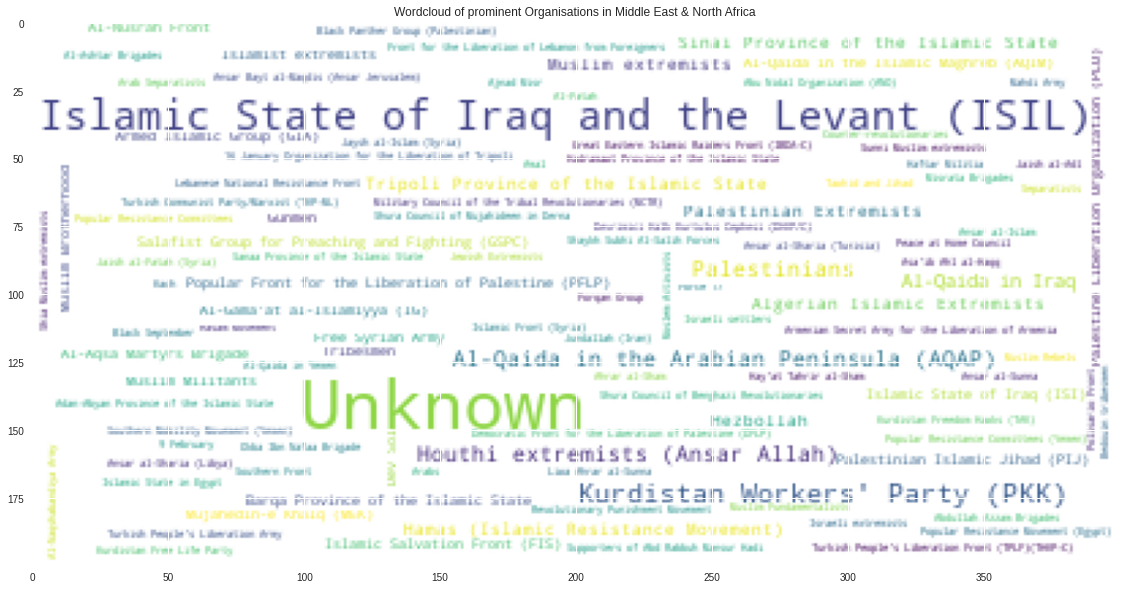

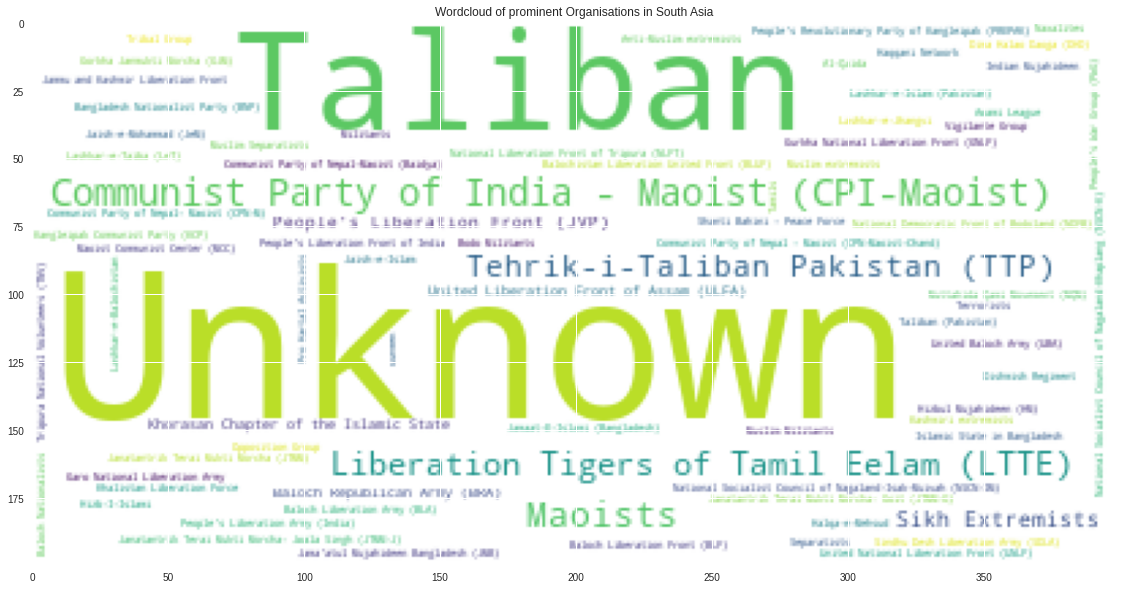

In [69]:
#Wordcloud of prominent Organisations in Middle East & North Africa
global_organisation_dict_me={}
for group,attacks in zip(organisation_data_me.ORGANISATION,organisation_data_me['No.of attacks']):
  global_organisation_dict_me[group]=attacks

wordcloud = WordCloud(background_color='white',collocations=False)
wordcloud.generate_from_frequencies(frequencies=global_organisation_dict_me) #using the dictionary created earlier
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Wordcloud of prominent Organisations in Middle East & North Africa')
plt.axis("on")
plt.show()

#Wordcloud of prominent Organisations in South Asia
global_organisation_dict_sa={}
for group,attacks in zip(organisation_data_sa.ORGANISATION,organisation_data_sa['No.of attacks']):
  global_organisation_dict_sa[group]=attacks

wordcloud = WordCloud(background_color='white',collocations=False)
wordcloud.generate_from_frequencies(frequencies=global_organisation_dict_sa) #using the dictionary created earlier
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Wordcloud of prominent Organisations in South Asia')
plt.axis("on")
plt.show()

In [70]:
#Top 20 organisation in Middle East and North Africa
organisation_data_top_20_me=mej.sort_values(by='No.of attacks percentage',ascending=False).head(10)
display(organisation_data_top_20_me)
#Treemap based on organisation and country  in terms of number of attacks
treemap=px.treemap(data_frame=global_terrorismdata_me,
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation and country in terms of number of attacks')
treemap.show()




#Top 20 organisation in South Asia
organisation_data_top_20_sa=saj.sort_values(by='No.of attacks percentage',ascending=False).head(10)
display(organisation_data_top_20_sa)
#Treemap based on organisation and country in terms of number of attacks
treemap=px.treemap(data_frame=global_terrorismdata_sa,
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY',],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation and country in terms of number of attacks')
treemap.show()

ORGANISATION  No.of attacks  \
721                                      Unknown          29377   
328  Islamic State of Iraq and the Levant (ISIL)           5563   
412               Kurdistan Workers' Party (PKK)           2137   
538                                 Palestinians           1105   
281              Houthi extremists (Ansar Allah)           1062   
70      Al-Qaida in the Arabian Peninsula (AQAP)           1017   
66                              Al-Qaida in Iraq            637   
626          Sinai Province of the Islamic State            445   
531                       Palestinian Extremists            440   
267          Hamas (Islamic Resistance Movement)            407   

     Attack successful  No.of attacks percentage  Success percentage  \
721              25676                 58.202243           87.401709   
328               4711                 11.021516           84.684523   
412               2011                  4.233863           94.103884   
538                886                  2.189246           80.180995   
281                896                  2.104054           84.369115   
70                 899                  2.014899           88.397247   
66                 623                  1.262036           97.802198   
626                399                  0.881642           89.662921   
531                286                  0.871736           65.000000   
267                342                  0.806356           84.029484   

     CASUALTIES  CASUALTIES PERCENTAGE  Casuality to Attack ratio  
721    171310.0              48.674528                   5.831433  
328     68255.0              19.393380                  12.269459  
412      9827.0               2.792158                   4.598503  
538      2173.0               0.617417                   1.966516  
281      6484.0               1.842307                   6.105461  
70       6624.0               1.882086                   6.513274  
66      14721.0               4.182696                  23.109890  
626      2787.0               0.791874                   6.262921  
531       772.0               0.219349                   1.754545  
267      4017.0               1.141355                   9.869779

ORGANISATION  No.of attacks  \
580                                         Unknown          21913   
501                                         Taliban           7477   
136  Communist Party of India - Maoist (CPI-Maoist)           1878   
330                                         Maoists           1625   
310         Liberation Tigers of Tamil Eelam (LTTE)           1604   
519                 Tehrik-i-Taliban Pakistan (TTP)           1350   
477                                 Sikh Extremists            712   
416                 People's Liberation Front (JVP)            433   
567         United Liberation Front of Assam (ULFA)            357   
284           Khorasan Chapter of the Islamic State            343   

     Attack successful  No.of attacks percentage  Success percentage  \
580              18385                 48.723707           83.899968   
501               6679                 16.625161           89.327270   
136               1774                  4.175746           94.462194   
330               1304                  3.613199           80.246154   
310               1529                  3.566505           95.324190   
519               1267                  3.001734           93.851852   
477                669                  1.583137           93.960674   
416                413                  0.962778           95.381062   
567                327                  0.793792           91.596639   
284                293                  0.762663           85.422741   

     CASUALTIES  CASUALTIES PERCENTAGE  Casuality to Attack ratio  
580     77481.0              31.927361                   3.535846  
501     57337.0              23.626684                   7.668450  
136      4009.0               1.651976                   2.134718  
330      3006.0               1.238673                   1.849846  
310     22020.0               9.073715                  13.728180  
519     15574.0               6.417531                  11.536296  
477      4627.0               1.906634                   6.498596  
416      1838.0               0.757379                   4.244804  
567      2772.0               1.142250                   7.764706  
284      4962.0               2.044676                  14.466472

In [71]:
#BAR PLOT OF ORGANISATION AND THERE SUCCESS PERCENTAGE (MIDDLE EAST AND NORTH AFRICA)
px.bar(data_frame=organisation_data_me[organisation_data_me.ORGANISATION!='Unknown'].sort_values(by='No.of attacks',ascending=False).head(10).sort_values(by='Success percentage',ascending=False),
                  width=1500,height=800,
                  x='Success percentage',y='ORGANISATION',
                  hover_data=['CASUALTIES'],color='CASUALTIES',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='ORGANISATION AND THERE SUCCESS PERCENTAGE (MIDDLE EAST AND NORTH AFRICA')


In [72]:

#BAR PLOT OF ORGANISATION AND THERE SUCCESS PERCENTAGE (SOUTH ASIA)
px.bar(data_frame=organisation_data_sa[organisation_data_sa.ORGANISATION!='Unknown'].sort_values(by='No.of attacks',ascending=False).head(10).sort_values(by='Success percentage',ascending=False),
                  width=1500,height=800,
                  x='Success percentage',y='ORGANISATION',
                  hover_data=['CASUALTIES'],color='CASUALTIES',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='ORGANISATION AND THERE SUCCESS PERCENTAGE (SOUTH ASIA)')


REMARKS:

In case of Middle East & North Africa,

    • ISIL had maximum attacks of 11% causing 68,255 casualties (19% of total casualties)

    • Al-Qaida in Iraq had the highest casualty to attack ratio of 23 (637 attacks and 14,721 casualties)

    • Al-Qaida in Iraq had the highest success percentage 97.8%

    • ISIL had the highest casualty of 68,255 with a success percentage of 84.6%



In case of South Asia,

    • Al-Qaida in Iraq had the highest success percentage 97.8%

    • ISIL had the highest casualty of 68,255 with a success percentage of 84.6%

    • People’s Liberation Front(JVP) and LTTE had the highest success percentage of 95.3% 

    • Taliban with the highest casualty of 57,337



In [73]:
#pie chart on attack type
attack_type_piechart=px.pie(global_terrorismdata_me.groupby('ATTACK TYPE')['No.of attacks'].count().reset_index(), 
          values='No.of attacks',
          names='ATTACK TYPE',
          title='Total number of attacks interms of attack type in Middle East & North Africa')
attack_type_piechart.show()#Middle East & North Africa

attack_type_piechart=px.pie(global_terrorismdata_sa.groupby('ATTACK TYPE')['No.of attacks'].count().reset_index(), 
          values='No.of attacks',
          names='ATTACK TYPE',
          title='Total number of attacks interms of attack type in South Asia')
attack_type_piechart.show()# South Asia



#pie chart on weapon type
attack_type_piechart=px.pie(global_terrorismdata_me.groupby('WEAPON TYPE')['No.of attacks'].count().reset_index(), 
          values='No.of attacks',
          names='WEAPON TYPE',
          title='Total number of attacks interms of weapon type in Middle East & North Africa')
attack_type_piechart.show()#Middle East & North Africa
attack_type_piechart=px.pie(global_terrorismdata_sa.groupby('WEAPON TYPE')['No.of attacks'].count().reset_index(), 
          values='No.of attacks',
          names='WEAPON TYPE',
          title='Total number of attacks interms of weapon type in South Asia')
attack_type_piechart.show()#South Asia



REMARKS:

Bombing , armed assault followed by assassination is most preferred attack type in both regions as well as globally

In [74]:
#Treemap based on attack type and organisation in terms of number of attacks (Middle East & North Africa)
treemap=px.treemap(data_frame=global_terrorismdata_me[global_terrorismdata_me.ORGANISATION!='Unknown'],
           values='No.of attacks',
           path=['ATTACK TYPE','ORGANISATION'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on attack type and organisation in terms of number of attacks (Middle East & North Africa)')
treemap.show()
#Treemap based on attack type and organisation in terms of number of attacks (South Asis)
treemap=px.treemap(data_frame=global_terrorismdata_sa[global_terrorismdata_sa.ORGANISATION!='Unknown'],
           values='No.of attacks',
           path=['ATTACK TYPE','ORGANISATION'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on attack type and organisation in terms of number of attacks (South Asis)')
treemap.show()

Remarks:

In case of Middle East & North Africa,

    ISIL had highest number of attacks in bombing & hostage taking and PKK in armed assault & facility/infrastructure attacks.

In case of South Asia,


    Taliban had highest number of attacks in bombing, armed assault,hostage taking, assassination and hijacking

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



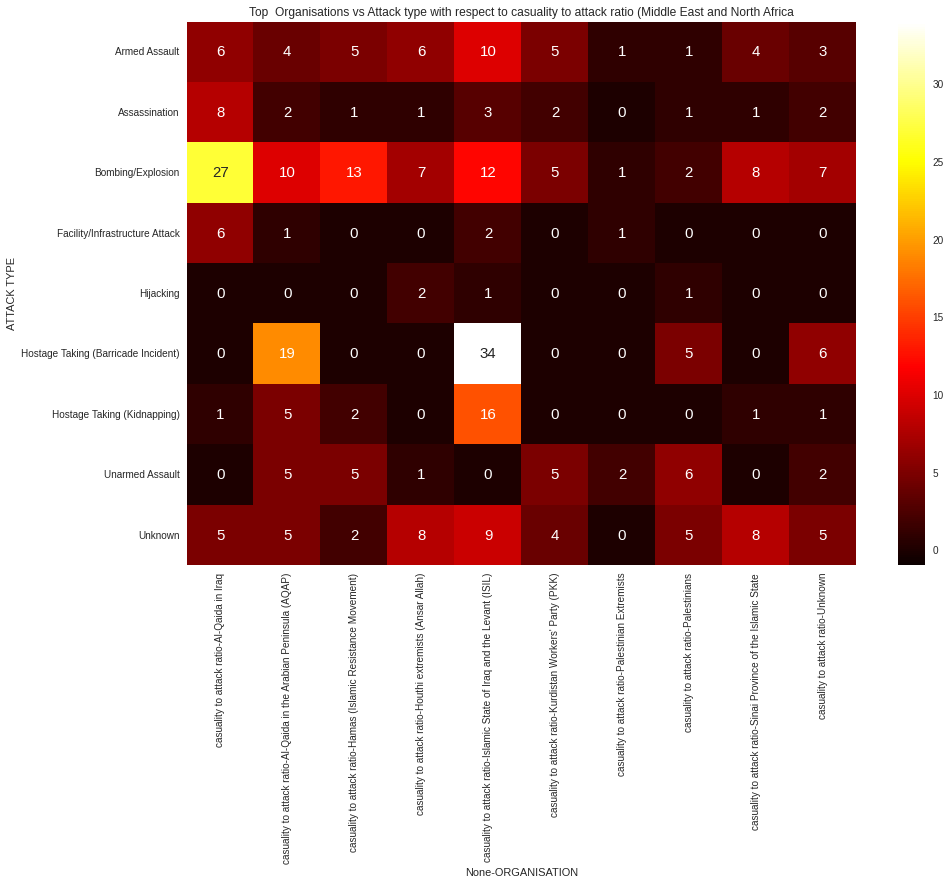

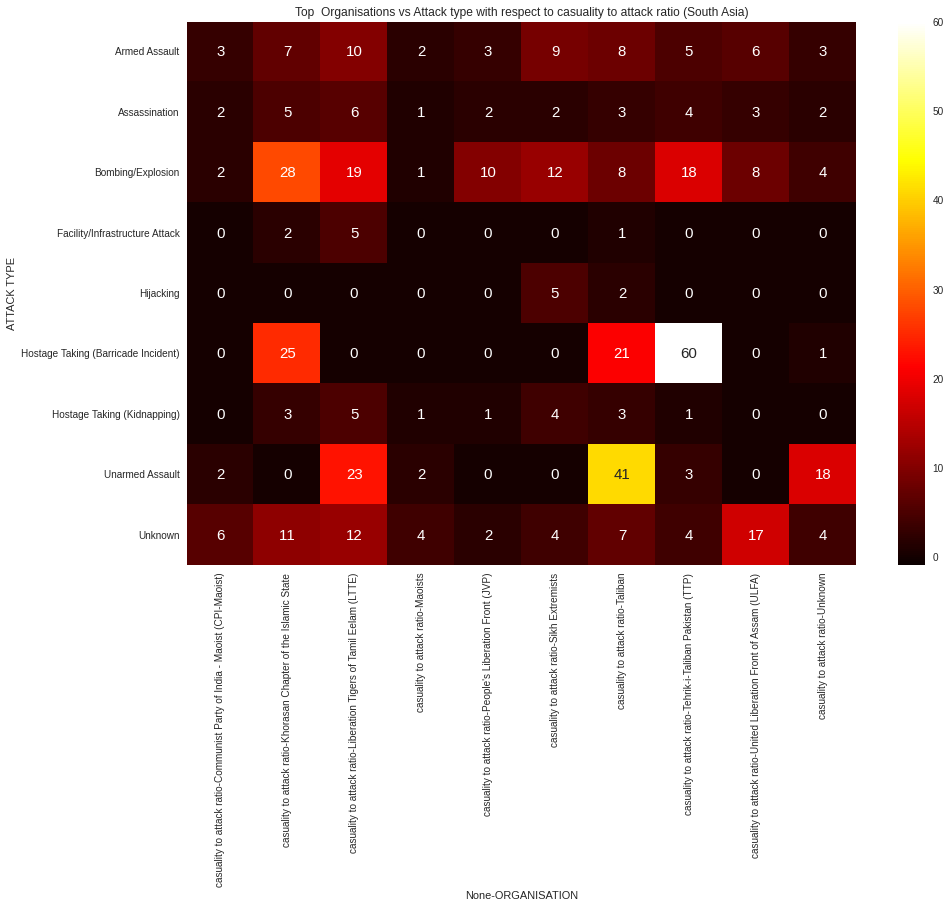

In [ ]:
#Top  Organisations vs Attack type with respect to casuality to attack ratio (Middle East and North Africa)
temp=global_terrorismdata_me[global_terrorismdata_me['ORGANISATION'].isin(list(organisation_data_top_20_me['ORGANISATION']))] 
temp['casuality to attack ratio']=temp['CASUALTY']/temp['No.of attacks']
c_to_a_attack_type=temp.sort_values('No.of attacks',ascending=False)
#grouping the resulting df by organisation and weapon types
c_to_a_attack_type=c_to_a_attack_type.groupby(['ORGANISATION','ATTACK TYPE'])['casuality to attack ratio'].mean().reset_index()

#sorting the resulting df by casualty to attack ratio
c_to_a_attack_type.sort_values('casuality to attack ratio',ascending=False,inplace=True)

c_to_a_attack_type_pivot=c_to_a_attack_type.pivot_table(index='ATTACK TYPE',columns='ORGANISATION')
c_to_a_attack_type_pivot.fillna(0,inplace=True)
c_to_a_attack_type_pivot=c_to_a_attack_type_pivot.astype(int)
plt.style.use('seaborn')
#generating heat map
colormap =sns.color_palette('hot', as_cmap=True)   
plt.figure(figsize=(15,10))
plt.title('Top  Organisations vs Attack type with respect to casuality to attack ratio (Middle East and North Africa')
sns.heatmap(c_to_a_attack_type_pivot, vmin=-1, cmap=colormap, annot=True,fmt='d', annot_kws={'size':15})





#Top  Organisations vs Attack type with respect to casuality to attack ratio (South Asia)
temp=global_terrorismdata_sa[global_terrorismdata_sa['ORGANISATION'].isin(list(organisation_data_top_20_sa['ORGANISATION']))] 
temp['casuality to attack ratio']=temp['CASUALTY']/temp['No.of attacks']
c_to_a_attack_type=temp.sort_values('No.of attacks',ascending=False)
#grouping the resulting df by organisation and weapon types
c_to_a_attack_type=c_to_a_attack_type.groupby(['ORGANISATION','ATTACK TYPE'])['casuality to attack ratio'].mean().reset_index()

#sorting the resulting df by casualty to attack ratio
c_to_a_attack_type.sort_values('casuality to attack ratio',ascending=False,inplace=True)
c_to_a_attack_type_pivot=c_to_a_attack_type.pivot_table(index='ATTACK TYPE',columns='ORGANISATION')
c_to_a_attack_type_pivot.fillna(0,inplace=True)
c_to_a_attack_type_pivot=c_to_a_attack_type_pivot.astype(int)
plt.style.use('seaborn')
#generating heat map
colormap =sns.color_palette('hot', as_cmap=True)   
plt.figure(figsize=(15,10))
plt.title('Top  Organisations vs Attack type with respect to casuality to attack ratio (South Asia)')
sns.heatmap(c_to_a_attack_type_pivot, vmin=-1, cmap=colormap, annot=True,fmt='d', annot_kws={'size':15})


REMARKS:

In the case of the Middle East & North  Africa,


    •ISIL in hostage-taking(Barricade incident) had the highest value of 34 in the case of the Middle East & North  Africa
    •In case of most preferred attack type i.e, bombing, Al-Qaida in Iraq had highest of 27.
    •ISIL and AQAP involved in 7 out of 8 attack types

In the case of the Middle East & North  Africa,


    • TTP in hostage-taking(Barricade incident) had the highest value of 60.
    • In case of most preferred attack type i.e, bombing, Khorasan chapter of Islamic state had highest value of 28.
    • Taliban involved in all attack types with highest value of 41 in unarmed Assault
